<a href="https://colab.research.google.com/github/prabhudc/DQ/blob/master/Predicting_Bike_Rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Rental Prediction

This project attempts to build a model that predict bike rentals. The dataset is a hourly consisting of features such as the season, weather, temperation, windspeed etc.

In [187]:
# The usual suspects
import pandas as pd
import numpy as np
import csv
import math

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [118]:
bike_rentals = pd.read_csv("/content/drive/My Drive/DataScience/files/hour-bike-sharing.csv")
bike_rentals.sample(n=5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5852,5853,2011-09-06,3,0,9,8,0,2,1,3,0.54,0.5152,0.83,0.3881,15,349,364
9326,9327,2012-01-29,1,1,1,12,0,0,0,1,0.32,0.3030,0.26,0.2239,73,215,288
14865,14866,2012-09-16,3,1,9,14,0,0,0,1,0.66,0.6212,0.39,0.1343,225,410,635
5104,5105,2011-08-05,3,0,8,14,0,5,1,2,0.78,0.7121,0.52,0.2537,81,164,245
6630,6631,2011-10-08,4,0,10,20,0,6,0,1,0.52,0.5000,0.77,0.1045,78,124,202


## Data Exploration and Preperation

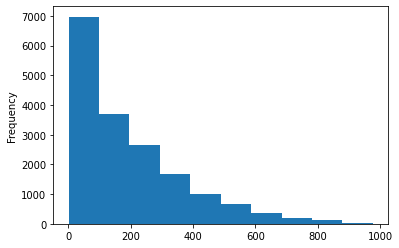

In [119]:
bike_rentals['cnt'].plot.hist()
plt.show()

Understand the correlation of each column with cnt

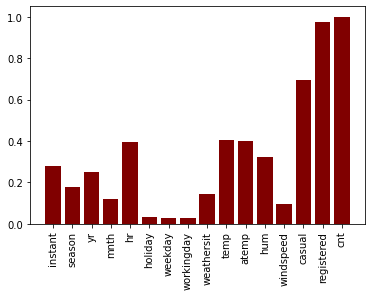

In [120]:
# la
corr_cnt = np.abs(bike_rentals.corr()['cnt'])
x = corr_cnt.index
h = corr_cnt

plt.bar(x,h,color="maroon")
plt.xticks(rotation=90)

plt.show()


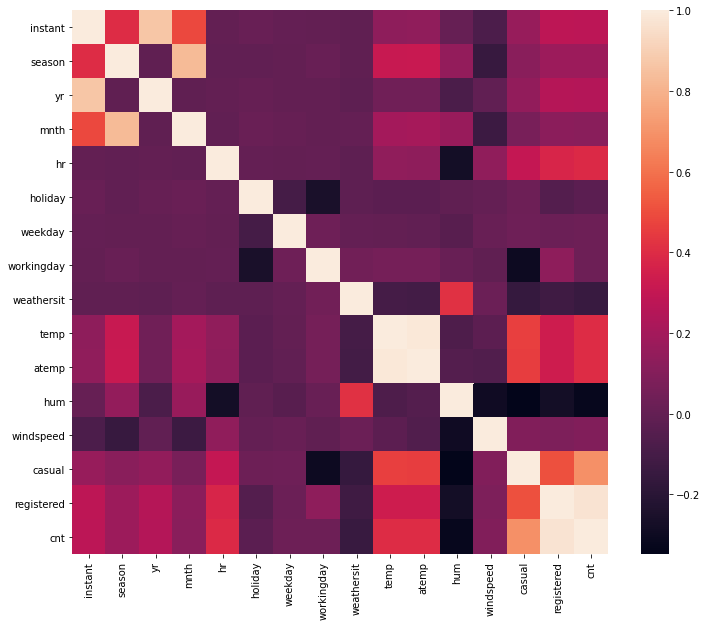

In [121]:
plt.figure(figsize=(12,10))
sns.heatmap(bike_rentals.corr())
plt.show()

In [122]:
def assign_label(hr) :
  if hr in range(6,12):
    return 1
  elif hr in range(12,18):
    return 2
  elif hr in range(18,24) :
    return 3
  else :
    return 4
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

## Modelling

In [123]:
train_size = 0.8
# Shuffle the dataset
bike_rentals = bike_rentals.iloc[np.random.choice(bike_rentals.index,bike_rentals.shape[0])]
# drop the index
bike_rentals.reset_index(inplace=True,drop=True)

# Create train/test split
train = bike_rentals.iloc[:math.floor(train_size*bike_rentals.shape[0])]
test = bike_rentals.iloc[math.floor(train_size*bike_rentals.shape[0]):]


print("Size of training set : ", train.shape[0], " with split percentage " , np.round(100*train.shape[0]/bike_rentals.shape[0],2) )
print("Size of testing set : ", " with split percentage " , np.round(100*test.shape[0]/bike_rentals.shape[0],2) )

Size of training set :  13903  with split percentage  80.0
Size of testing set :   with split percentage  20.0


Ignoring the following columns
  * humidity - has weak correlation with the target variable
  * workingday and casual are correlated, but workingday is relatively weakly
       correlated with the target. Hence droping workingday. 
  * instant - just numerical counter
  * dteday - Day , information is already encoded in other fields
  * yr - Does not help with prediction
  * temp - feeling termperature has been included, hence can ignore this
  * casual - reveals the output variable
  * registered - reveals the output variable

In [124]:
# drop_cols = ['hum','workingday','instant','dteday','yr','temp','casual', 'registered' ]
drop_cols = ['casual', 'registered', 'dteday' ]
columns = bike_rentals.columns[~bike_rentals.columns.isin(drop_cols)]

train = train[columns]
test =  test[columns]


# Create X/y
X_train = train[train.columns[train.columns != 'cnt' ]]
y_train = train['cnt']

X_test = test[test.columns[test.columns != 'cnt' ]]
y_test = test['cnt']


### Apply Linear Regression

In [125]:
# Instantiate
linear_model = LinearRegression()

# Fit
linear_model.fit(X_train, y_train)

# Predict
y_pred = linear_model.predict(X_test)

# Error measurement - MSE
mse = np.mean((y_pred  - y_test )**2)
print(mse)


16856.116683758428


### Apply Decision Tree

In [186]:
# Instantiate 
dt_model = DecisionTreeRegressor( min_samples_leaf=2, max_features="auto" )

# Fit
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)

# Error measurement - MSE
mse = np.mean((y_pred  - y_test )**2)
print(mse)

1514.0899017069428


### Apply Random Forest

In [227]:
# Instantiate 
rf_model = RandomForestRegressor(  n_estimators=100)

# Fit
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Error measurement - MSE
mse = np.mean((y_pred  - y_test )**2)
print(mse)

840.5650796605296


## Summary

On comparing three modelling techniques - 
* Linear Regression
* Decision Tree
* Random Forest

The models demonstrated improvement in MSE in the following order

Linear Regression (16856) > Decision Tree (1514) >> Random Forest (840)



---


